# Plotting Things in Narrative Time

In [99]:
import pandas as pd
import nltk
from collections import Counter

In [2]:
moonstone = open('../Readings/content/texts/moonstone.md').read()

In [4]:
moonstoneTokens = nltk.word_tokenize(moonstone.lower())

In [6]:
moonstoneTokens.index('herncastle')

103

In [8]:
list(zip([1, 2, 3], ['a', 'b', 'c']))

[(1, 'a'), (2, 'b'), (3, 'c')]

In [10]:
list(enumerate(['a', 'b', 'c']))

[(0, 'a'), (1, 'b'), (2, 'c')]

In [11]:
moonstoneTokensEnumerated = enumerate(moonstoneTokens)

In [16]:
# As a for loop
for i, token in enumerate(moonstoneTokens): 
    if token == 'herncastle': 
        print(token, ': ', str(i))

herncastle :  103
herncastle :  1160
herncastle :  1316
herncastle :  1410
herncastle :  1692
herncastle :  1759
herncastle :  1963
herncastle :  2051
herncastle :  2166
herncastle :  2478
herncastle :  2988
herncastle :  14201
herncastle :  14448
herncastle :  15870
herncastle :  17223
herncastle :  21123
herncastle :  37301
herncastle :  92502
herncastle :  130620
herncastle :  132168
herncastle :  139349
herncastle :  141568
herncastle :  141909
herncastle :  142119
herncastle :  142463
herncastle :  143574
herncastle :  143972


In [19]:
herncastleLocations = [i for i, token in enumerate(moonstoneTokens) if token == 'herncastle']

In [20]:
herncastleLocations

[103,
 1160,
 1316,
 1410,
 1692,
 1759,
 1963,
 2051,
 2166,
 2478,
 2988,
 14201,
 14448,
 15870,
 17223,
 21123,
 37301,
 92502,
 130620,
 132168,
 139349,
 141568,
 141909,
 142119,
 142463,
 143574,
 143972]

## Binning

Given a list of something, we want to make a histogram, where we count the number of things in each category. 

Ex: Ages: 14, 14, 14, 15, 18, 30, 45, 60, 75, 100

0-12, 13-18, 19-30, 31-50 
--------------------------
 0      5      1     1
 

In [24]:
categories, bins = pd.cut(range(len(moonstoneTokens)), bins=10, retbins=True)

In [25]:
bins

array([  -233.922,  23392.2  ,  46784.4  ,  70176.6  ,  93568.8  ,
       116961.   , 140353.2  , 163745.4  , 187137.6  , 210529.8  ,
       233922.   ])

In [29]:
herncastleBinned = pd.cut(herncastleLocations, bins).value_counts()

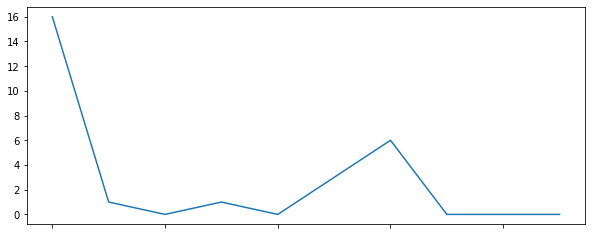

In [33]:
herncastleBinned.plot(figsize=(10,4))

In [128]:
def binTokens(word, nBins=10): 
    indices = [i for i, token in enumerate(moonstoneTokens) if token == word]
    categories, bins = pd.cut(range(len(moonstoneTokens)), bins=nBins, retbins=True)
    binned = pd.cut(indices, bins).value_counts()
    return binned

In [129]:
pd.DataFrame({"herncastle": binTokens("herncastle"), "diamond": binTokens('diamond')})

,herncastle,diamond
"(-233.922, 23392.2]",16,65
"(23392.2, 46784.4]",1,53
"(46784.4, 70176.6]",0,21
"(70176.6, 93568.8]",1,24
"(93568.8, 116961.0]",0,12
"(116961.0, 140353.2]",3,5
"(140353.2, 163745.4]",6,32
"(163745.4, 187137.6]",0,31
"(187137.6, 210529.8]",0,29
"(210529.8, 233922.0]",0,43


In [130]:
def plotNarrativeTime(words): 
    wordsAndLocations = {word: binTokens(word) for word in words}
    return pd.DataFrame(wordsAndLocations).plot()

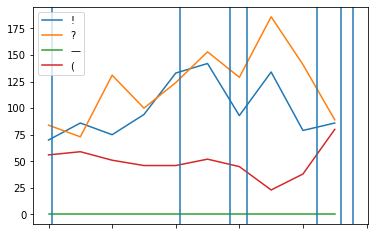

In [132]:
plotAxis = plotNarrativeTime(['!', '?', '—', '('])
moonstoneNoTOC = moonstone[400:]
for marker in ["First Period", "First Narrative", "Second Narrative", "Third Narrative", 
               "Fourth Narrative", "Fifth Narrative", "Sixth Narrative"]:
    markerIndex = moonstoneNoTOC.index(marker)
    plotAxis.axvline((markerIndex / len(moonstoneNoTOC)*10))

# N-grams

N-grams are just collections of N- numbers of words. 

1. unigrams
2. bigrams
3. trigrams

4-grams, 5-grams

In [79]:
tokens = ["The", "quick", "brown", "fox", "jumped"]

In [81]:
bigrams = [("The", "quick"), ("quick", "brown"), ("brown", "fox"), ("fox", "jumped") ]

In [82]:
bigrams

[('The', 'quick'), ('quick', 'brown'), ('brown', 'fox'), ('fox', 'jumped')]

In [84]:
tokens

['The', 'quick', 'brown', 'fox', 'jumped']

In [85]:
tokens[1:]

['quick', 'brown', 'fox', 'jumped']

In [88]:
list(zip(tokens, tokens[1:], tokens[2:]))

[('The', 'quick', 'brown'),
 ('quick', 'brown', 'fox'),
 ('brown', 'fox', 'jumped')]

In [90]:
list(nltk.ngrams(tokens, 3))

[('The', 'quick', 'brown'),
 ('quick', 'brown', 'fox'),
 ('brown', 'fox', 'jumped')]

In [109]:
moonstoneTokensAlpha = [token for token in moonstoneTokens if token.isalpha()] # gets rid of n't

In [110]:
moonstoneTrigrams = nltk.ngrams(moonstoneTokensAlpha, 3)

In [112]:
moonstoneTrigramsList = list(moonstoneTrigrams)

In [114]:
Counter(moonstoneTrigramsList).most_common(20)

[(('i', 'don', 't'), 91),
 (('in', 'the', 'house'), 80),
 (('one', 'of', 'the'), 76),
 (('out', 'of', 'the'), 75),
 (('i', 'can', 't'), 62),
 (('of', 'the', 'moonstone'), 59),
 (('of', 'the', 'diamond'), 54),
 (('which', 'i', 'had'), 53),
 (('that', 'i', 'had'), 51),
 (('that', 'he', 'had'), 50),
 (('lady', 'verinder', 's'), 49),
 (('miss', 'verinder', 's'), 49),
 (('miss', 'rachel', 's'), 47),
 (('the', 'subject', 'of'), 47),
 (('my', 'lady', 's'), 46),
 (('the', 'end', 'of'), 43),
 (('the', 'rest', 'of'), 43),
 (('that', 'he', 'was'), 43),
 (('if', 'i', 'had'), 42),
 (('the', 'time', 'when'), 42)]

In [115]:
def commonNgrams(tokens, n): 
    ngrams = nltk.ngrams(tokens, n)
    ngramsList = list(ngrams)
    return Counter(ngramsList).most_common(20)

In [122]:
commonNgrams(moonstoneTokensAlpha, 5)

[(('on', 'the', 'subject', 'of', 'the'), 19),
 (('the', 'loss', 'of', 'the', 'diamond'), 13),
 (('it', 'is', 'needless', 'to', 'say'), 12),
 (('at', 'the', 'bottom', 'of', 'it'), 11),
 (('at', 'the', 'bottom', 'of', 'the'), 10),
 (('the', 'loss', 'of', 'the', 'moonstone'), 10),
 (('for', 'the', 'first', 'time', 'in'), 9),
 (('the', 'middle', 'of', 'the', 'room'), 9),
 (('the', 'subject', 'of', 'the', 'moonstone'), 9),
 (('is', 'needless', 'to', 'say', 'that'), 8),
 (('of', 'the', 'loss', 'of', 'the'), 7),
 (('the', 'turn', 'of', 'the', 'tide'), 7),
 (('of', 'which', 'i', 'am', 'now'), 7),
 (('the', 'last', 'rose', 'of', 'summer'), 7),
 (('my', 'lady', 'and', 'miss', 'rachel'), 6),
 (('nine', 'times', 'out', 'of', 'ten'), 6),
 (('was', 'at', 'the', 'bottom', 'of'), 6),
 (('which', 'i', 'am', 'now', 'writing'), 6),
 (('in', 'the', 'shape', 'of', 'a'), 6),
 (('i', 'don', 't', 'want', 'to'), 6)]

# Finding Multiple Tokens in Narrative Time

In [127]:
def binTokensTwo(twoWords, nBins=10): 
    firstWord, secondWord = twoWords
    indices = []
    for i, token in enumerate(moonstoneTokens): 
        if token == firstWord:
            nextToken = moonstoneTokens[i+1]
            if nextToken == secondWord: 
                indices.append(i)
    categories, bins = pd.cut(range(len(moonstoneTokens)), bins=nBins, retbins=True)
    binned = pd.cut(indices, bins).value_counts()
    return binned

In [125]:
binTokens(['my', 'pipe'])

(-233.922, 23392.2]     2
(23392.2, 46784.4]      1
(46784.4, 70176.6]      0
(70176.6, 93568.8]      2
(93568.8, 116961.0]     0
(116961.0, 140353.2]    0
(140353.2, 163745.4]    1
(163745.4, 187137.6]    0
(187137.6, 210529.8]    0
(210529.8, 233922.0]    0
dtype: int64